Assignment 4, Section 2

**Arash Asgari**


400201037


In [54]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [87]:
initial_data = cv2.imread("1.png")
b, g, r = cv2.split(initial_data)
initial_data.shape

(443, 640, 3)

Here we calculate the Single Value Decomposition of the Image and Keep only the most informative eigen values(the larger ones) and vectors.

In [19]:
def true_s(s, u, v):
  true_s_mat = np.zeros((u.shape[1], v.shape[0]))
  true_s_mat[:s.size, :s.size] = np.diag(s)
  return true_s_mat

In [102]:
def compress_dimension(inp_mat, compression_dim : int):
  # calculates SVD and keeps comression dims only
  u, s, vh = np.linalg.svd(inp_mat)
  u = u[:,:compression_dim]
  s = s[:compression_dim]
  vh = vh[:compression_dim]
  
  u = u.astype(np.float16)
  s = s.astype(np.float16)
  vh = vh.astype(np.float16)
  return image_return(u, s, vh), (u, s, vh)

In [116]:
def image_return(u, s, vh):
  # receives svd decomposition values and returns the retrived image
  dim = np.dot(u, np.dot(true_s(s, u, vh), vh))
  return dim

In [117]:
def calculate_memory_usage(svd_values_list):
  # calculates memory usage by svd values for red, green, and blue channels
  sum_ = 0
  for svd_values in svd_values_list:
    u, s, vh = svd_values
    u_size = u.size * u.itemsize
    s_size = s.size * s.itemsize
    vh_size = vh.size * vh.itemsize
    sum_ = sum_ + u_size + s_size + vh_size
  return sum_


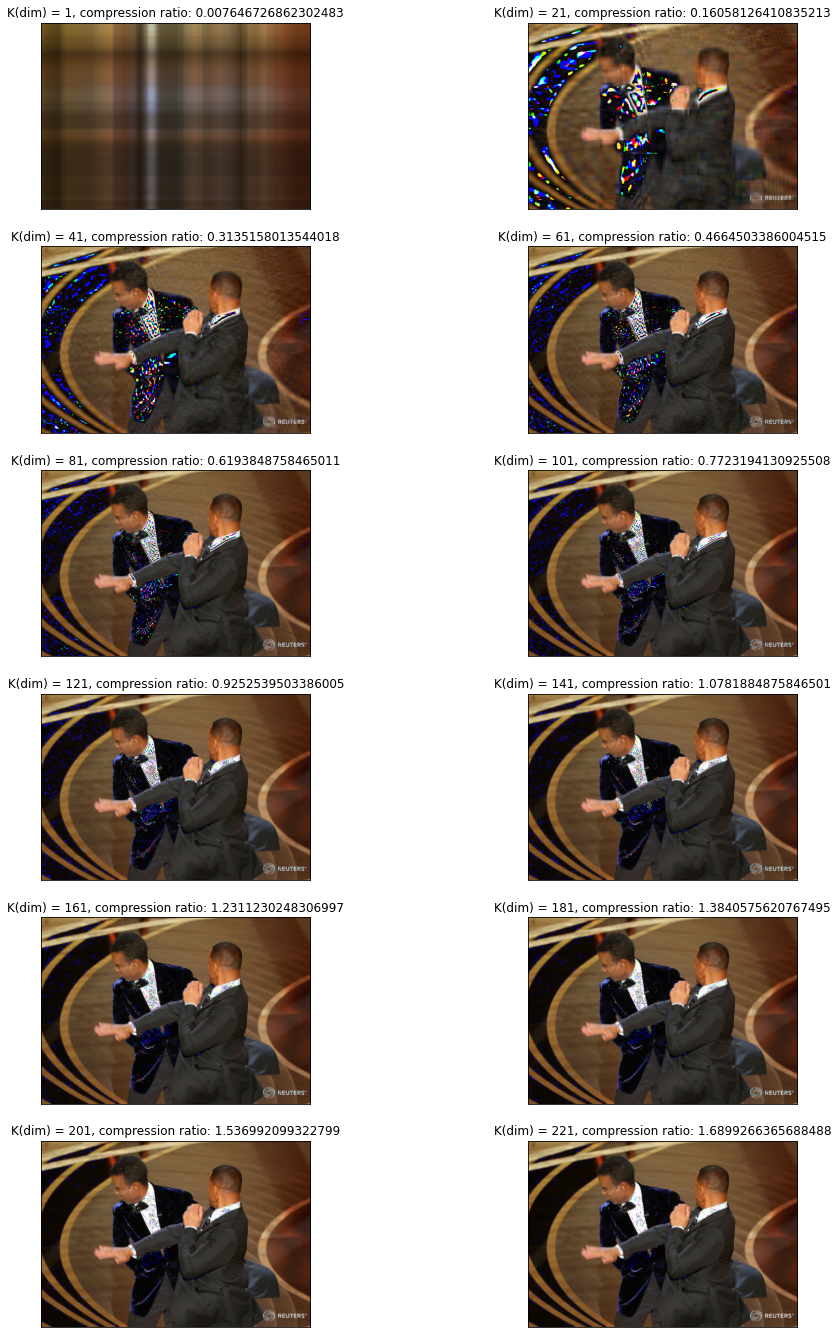

In [110]:
plt.rcParams['figure.figsize'] = [16, 24]
fig, axs = plt.subplots(6, 2)
initial_data_size = initial_data.size * initial_data.itemsize
compressed_data_size_list = []
for ind, dim in enumerate(range(1, 241, 20)):
  row = int(ind / 2)
  column = ind % 2
  K = dim
  b_compressed, b_svd_values = compress_dimension(b, K)
  g_compressed, g_svd_values = compress_dimension(g, K)
  r_compressed, r_svd_values = compress_dimension(r, K)
  img = np.stack((b_compressed, g_compressed, r_compressed), axis = 2)
  img = img.astype(np.uint8)
  compressed_data_size = calculate_memory_usage([b_svd_values, g_svd_values, r_svd_values])
  compressed_data_size_list.append( compressed_data_size)
  compression_ratio = compressed_data_size / initial_data_size
  axs[row, column].set_title("K(dim) = "+ str(K)+ ", compression ratio: "+ str(compression_ratio) )
  axs[row, column].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  axs[row, column].axes.xaxis.set_visible(False)
  axs[row, column].axes.yaxis.set_visible(False)



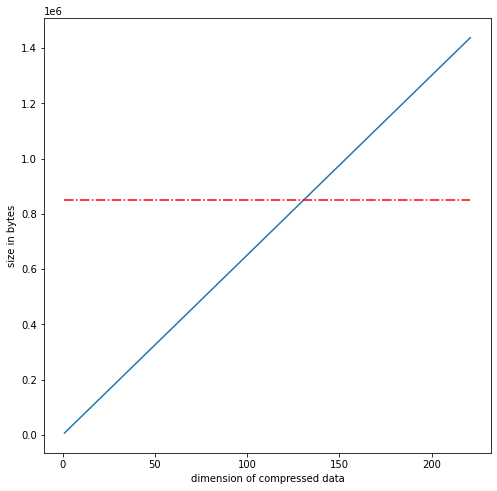

In [119]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.ylabel("size in bytes")
plt.xlabel("dimension of compressed data")
plt.plot(range(1, 241, 20),compressed_data_size_list)#compressed data size
plt.plot(range(1, 241, 20), np.repeat(np.array(initial_data_size), len(compressed_data_size_list)), color = "red", linestyle='-.')#input image size